In [943]:
!pip uninstall scikit-learn -y

!pip install -U scikit-learn

!pip install palmerpenguins

Found existing installation: scikit-learn 1.2.1
Uninstalling scikit-learn-1.2.1:
  Successfully uninstalled scikit-learn-1.2.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-1.2.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.8 MB)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [944]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns 
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from warnings import simplefilter
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn import tree
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
import random
import math
from palmerpenguins import load_penguins
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

Question 1(1):

In [945]:
data = pd.read_csv("/ENB2012_data.csv")
Y = data["Y1"].astype(float)
X = data.drop(['Y1'], axis = 'columns')

user_prompt = 0.3
user_enable = True

x_train,x_sum,y_train,y_sum = tts(X,Y,test_size=user_prompt,shuffle=user_enable)

user_prompt = 0.67
x_val,x_test,y_val,y_test = tts(x_sum,y_sum,test_size=user_prompt,shuffle=user_enable)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(537, 8)
(76, 8)
(155, 8)


Question 1(2)

In [946]:
model = DTR()
model.fit(x_train,y_train)
y_pred = model.predict(x_val)
mse_error = sklearn.metrics.mean_squared_error(y_val,y_pred)
print(mse_error)

0.40056710526315825


14


<function matplotlib.pyplot.show(*args, **kw)>

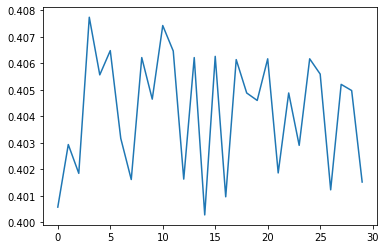

In [947]:
arr = []
for i in range(0,30):
  model = DTR(random_state = i)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_val)
  mse_error = sklearn.metrics.mean_squared_error(y_val,y_pred)
  arr.append(mse_error)
i = np.linspace(0,29,30)
k = arr.index(min(arr))
print(k)
plt.plot(i,arr)
plt.show

6


<function matplotlib.pyplot.show(*args, **kw)>

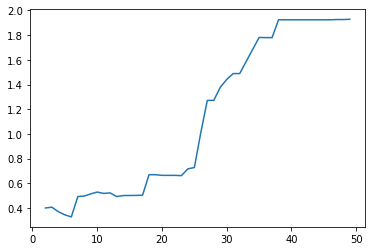

In [948]:
arr = []
for i in range(2,50):
  model = DTR(random_state = k,min_samples_split = i)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_val)
  mse_error = sklearn.metrics.mean_squared_error(y_val,y_pred)
  arr.append(mse_error)
i = np.linspace(2,49,48)
l = arr.index(min(arr)) + 2
print(l)
plt.plot(i,arr)
plt.show

10


<function matplotlib.pyplot.show(*args, **kw)>

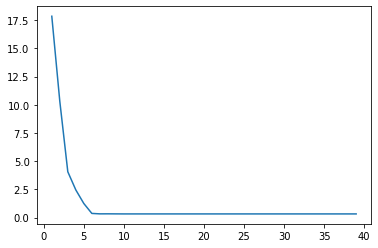

In [949]:
arr = []
for i in range(1,40):
  model = DTR(random_state = k,min_samples_split = l,max_depth = i)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_val)
  mse_error = sklearn.metrics.mean_squared_error(y_val,y_pred)
  arr.append(mse_error)
i = np.linspace(1,39,39)
m = arr.index(min(arr)) + 1
print(m)
plt.plot(i,arr)
plt.show

2


<function matplotlib.pyplot.show(*args, **kw)>

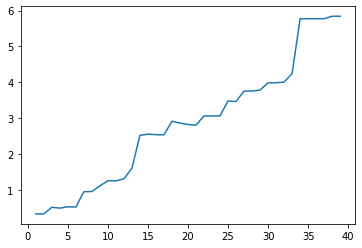

In [950]:
arr = []
for i in range(1,40):
  model = DTR(random_state = k,min_samples_split = l,max_depth = m, min_samples_leaf = i)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_val)
  mse_error = sklearn.metrics.mean_squared_error(y_val,y_pred)
  arr.append(mse_error)
i = np.linspace(1,39,39)
n = arr.index(min(arr)) + 1
print(n)
plt.plot(i,arr)
plt.show

60


<function matplotlib.pyplot.show(*args, **kw)>

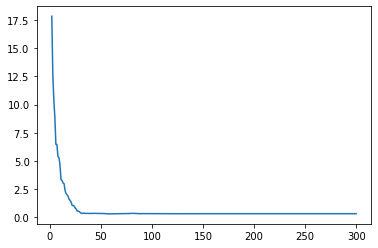

In [951]:
arr = []
for i in range(2,301):
  model = DTR(random_state = k,min_samples_split = l,max_depth = m, min_samples_leaf = n,max_leaf_nodes = i)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_val)
  mse_error = sklearn.metrics.mean_squared_error(y_val,y_pred)
  arr.append(mse_error)
i = np.linspace(2,300,299)
o = arr.index(min(arr)) + 2
print(o)
plt.plot(i,arr)
plt.show

Question 1(3)

In [952]:
#Hold_out_cross_validation
model = DTR(random_state = k,min_samples_split = l,max_depth = m, min_samples_leaf = n,max_leaf_nodes = o)
model.fit(x_train,y_train)
y_pred = model.predict(x_val)
mse_error = sklearn.metrics.mean_squared_error(y_val,y_pred)
print(mse_error)

0.306391198682953


In [953]:
k_cv = KFold(n_splits=5, shuffle=True)
scores = cross_val_score(model, X, Y,scoring = 'neg_mean_squared_error', cv=k_cv)
print(scores*(-1))

[0.34199535 0.28006099 0.28240336 0.30650412 0.33126803]


In [954]:
r_k_cv = RepeatedKFold(n_splits=5, n_repeats=5)
scores = cross_val_score(model, X, Y,scoring = 'neg_mean_squared_error', cv=r_k_cv)
print(scores*(-1))

[0.31997628 0.45912897 0.17004813 0.20108866 0.20073474 0.57590931
 0.35096571 0.30637289 0.23817157 0.26684423 0.3160084  0.17793323
 0.53516194 0.32133692 0.41286351 0.24566717 0.20131605 0.2936224
 0.51249343 0.24443495 0.19278934 0.22330628 0.46410713 0.2176908
 0.3968765 ]


In [955]:
y_pred = model.predict(x_test)
mse_error = sklearn.metrics.mean_squared_error(y_test,y_pred)
print(mse_error)

0.17920257263321426


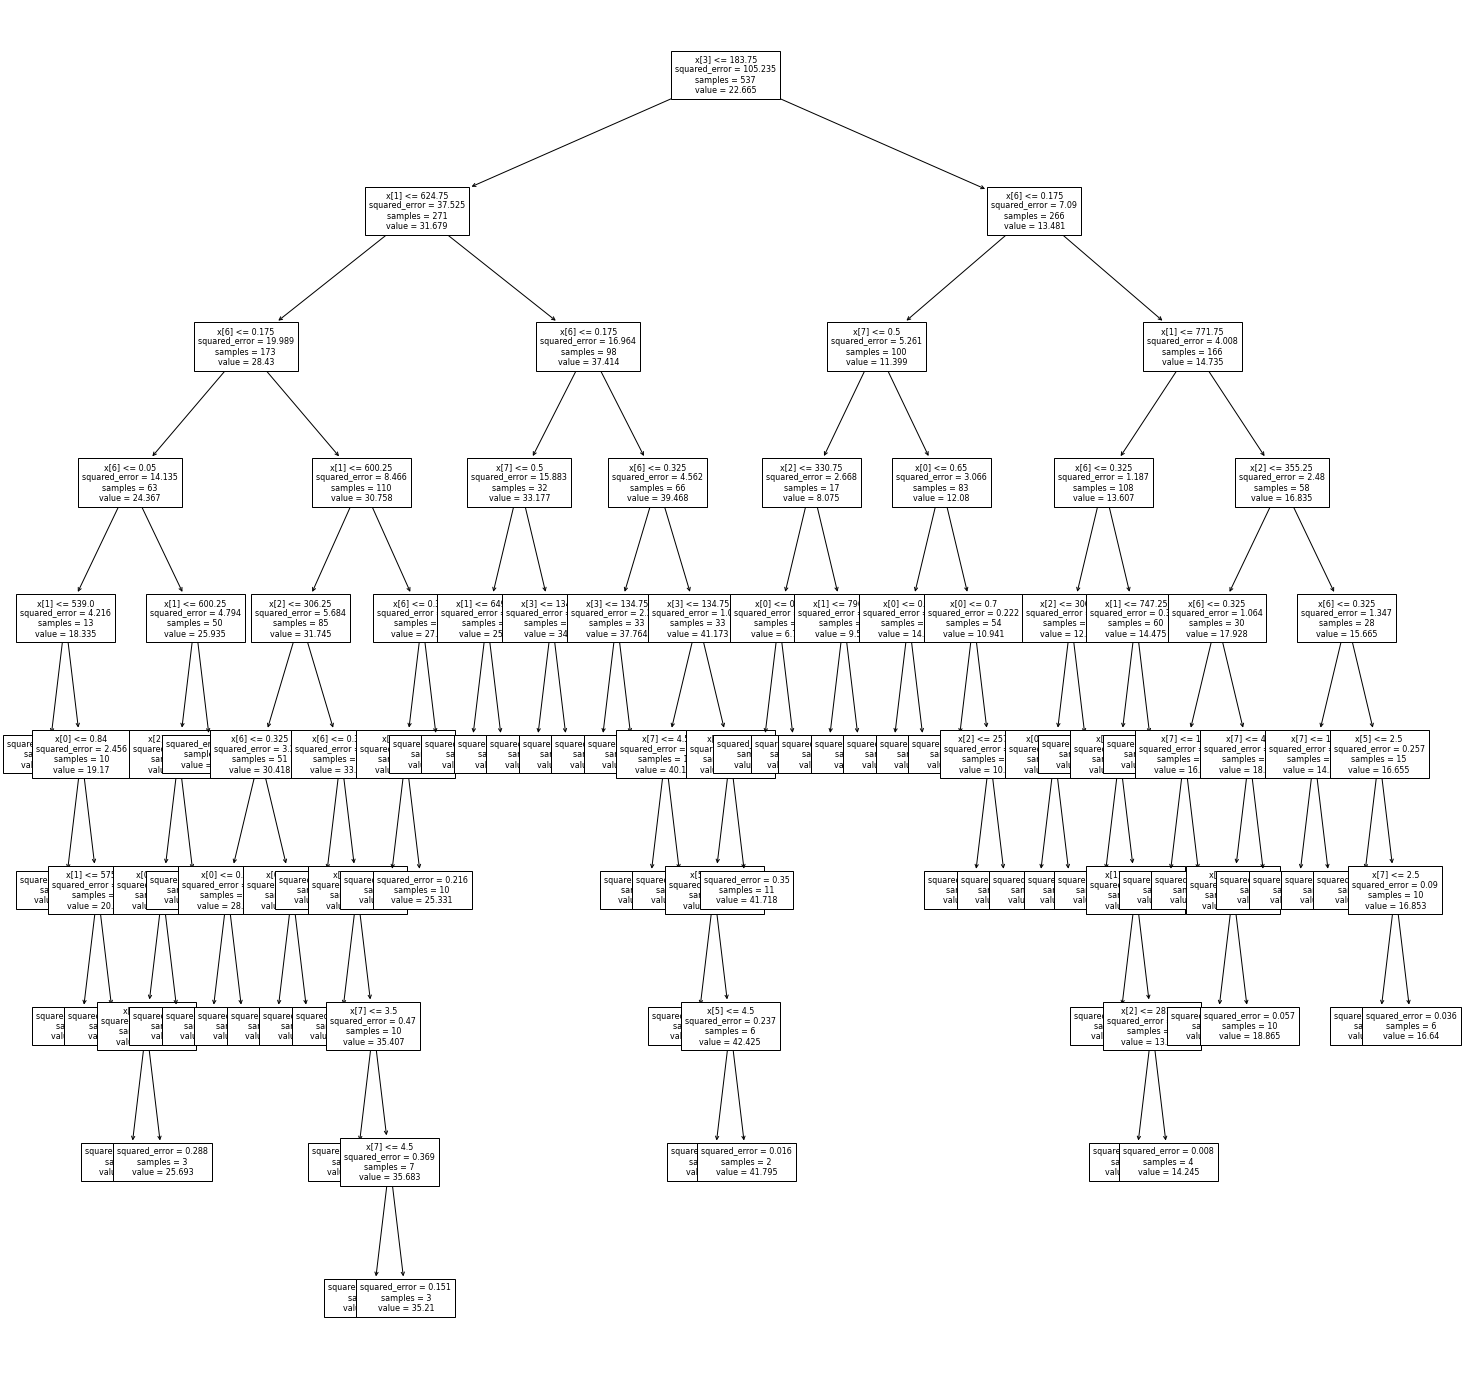

In [956]:
plt.figure(figsize=(25, 25))
tree.plot_tree(model,fontsize = 8)
plt.savefig('tree_high_dpi', dpi=100)

Question 1(4)

In [957]:
model1 = DTR(criterion = 'absolute_error')
model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)
mse_error = sklearn.metrics.mean_squared_error(y_test,y_pred)
mae_error = sklearn.metrics.mean_absolute_error(y_test,y_pred)

print(mse_error,mae_error)
model2 = DTR(criterion = 'squared_error')
model2.fit(x_train,y_train)
y_pred = model2.predict(x_test)
mse_error = sklearn.metrics.mean_squared_error(y_test,y_pred)
mae_error = sklearn.metrics.mean_absolute_error(y_test,y_pred)
print(mse_error,mae_error)

0.2506064516129033 0.3352258064516129
0.28387870967741935 0.3490322580645161


Question 2(1)

In [958]:
iris = datasets.load_iris()
Y = iris.target
X = iris.data[:, 2:]
user_prompt = 0.2
user_enable = True

x_train,x_test,y_train,y_test = tts(X,Y,test_size=user_prompt,shuffle=user_enable)

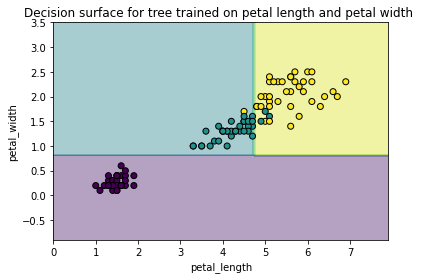

In [959]:
model = DTC(max_depth = 2)
model.fit(x_train,y_train)
disp = DecisionBoundaryDisplay.from_estimator(model, x_train, response_method="predict",xlabel='petal_length',alpha = 0.4, ylabel='petal_width')
disp.ax_.scatter(x_train[:, 0], x_train[:, 1], c=y_train,edgecolor="k")
plt.title(f"Decision surface for tree trained on petal length and petal width ")
plt.show()

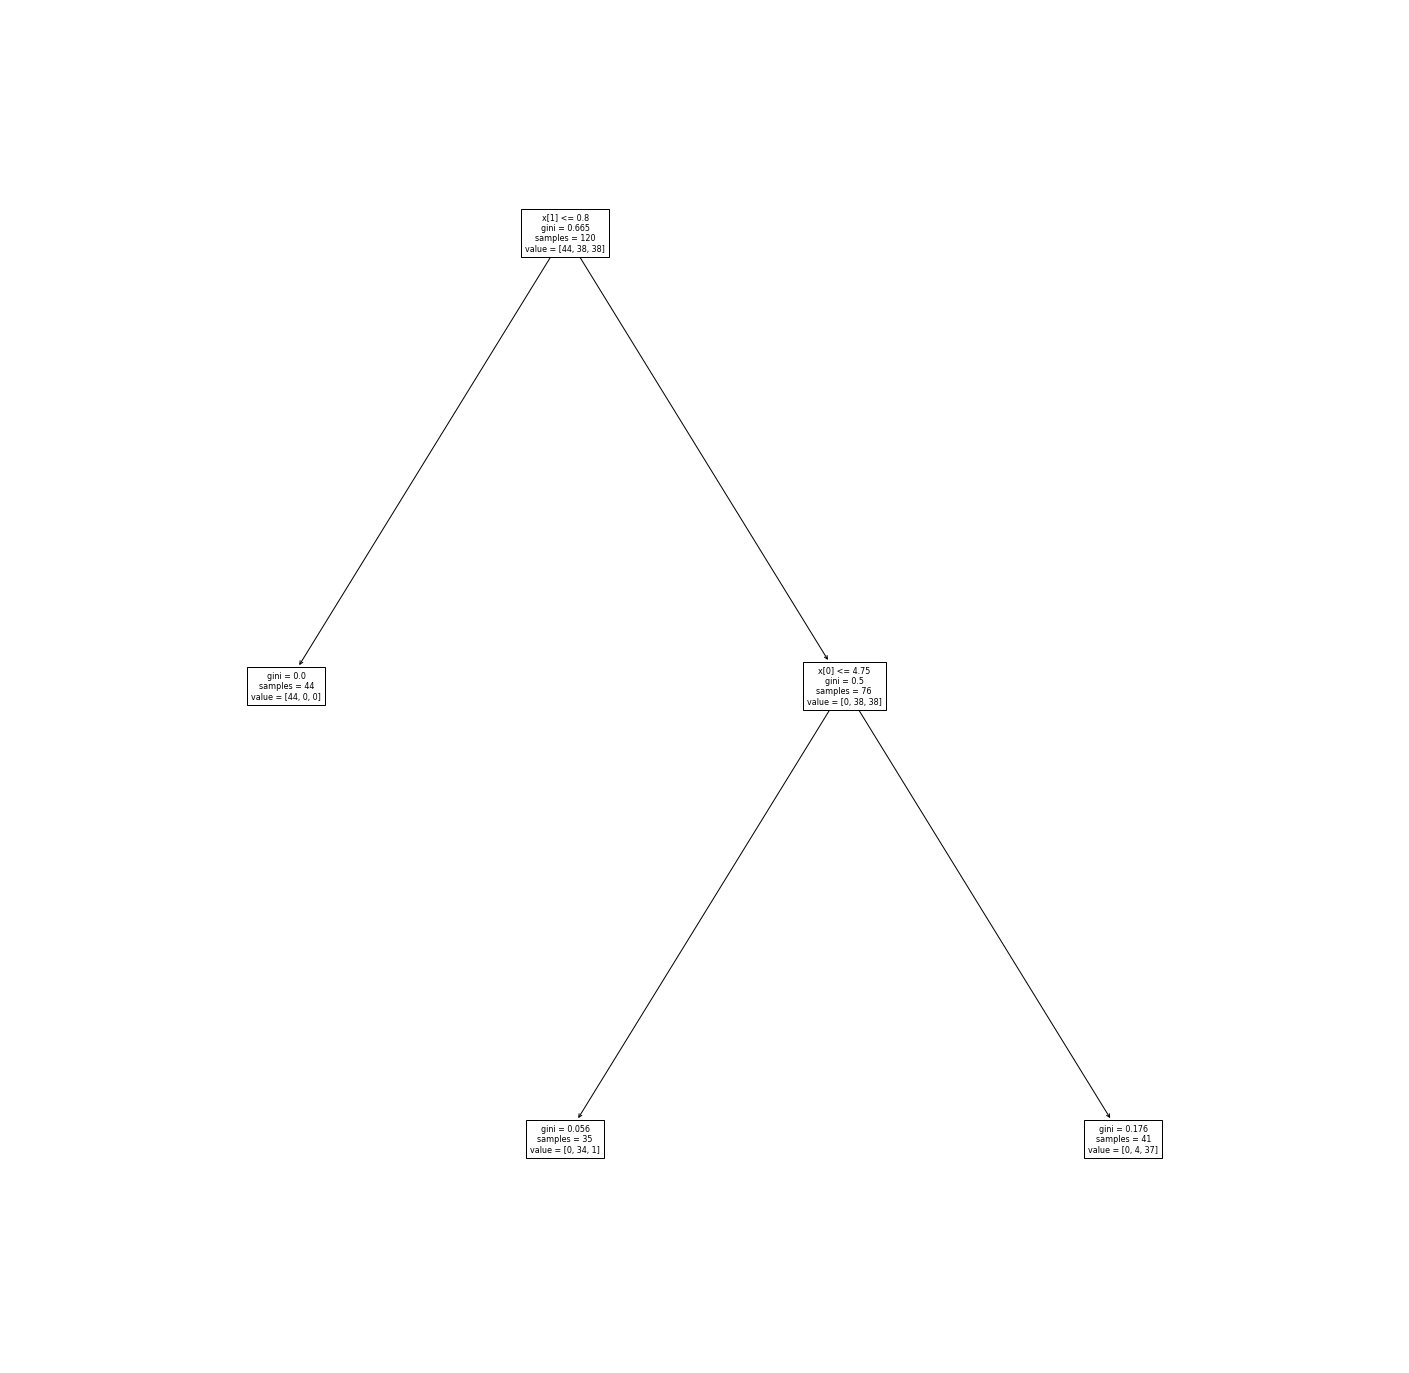

In [960]:
plt.figure(figsize=(25, 25))
tree.plot_tree(model,fontsize = 8)
plt.savefig('tree_high_dpi', dpi=100)

Question2(2)

[8, 22, 111]


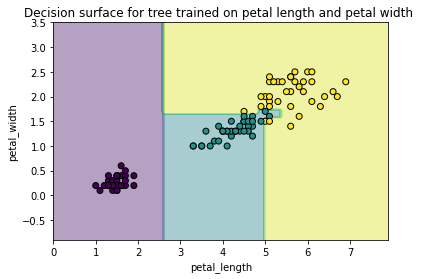

In [961]:
rem = []
for i in range(len(x_train)):
  elem1 = x_train[i,0]
  elem2 = x_train[i,1]
  if elem1 == 4.8 and elem2 == 1.8:
    rem.append(i) 
print(rem)
x_train1 = np.delete(x_train,rem,axis = 0)
y_train1 = np.delete(y_train,rem,axis = 0)
model = DTC(max_depth = None)
model.fit(x_train1,y_train1)
disp = DecisionBoundaryDisplay.from_estimator(model, x_train1, response_method="predict",xlabel='petal_length',alpha = 0.4, ylabel='petal_width')
disp.ax_.scatter(x_train1[:, 0], x_train1[:, 1], c=y_train1,edgecolor="k")
plt.title(f"Decision surface for tree trained on petal length and petal width ")
plt.show()

Question 2(3)

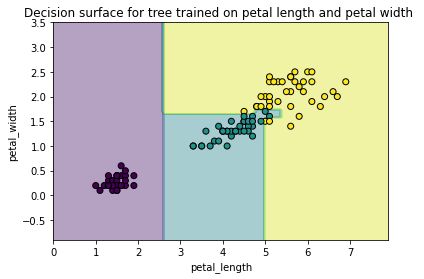

In [962]:
model = DTC(max_depth = None)
model.fit(x_train,y_train)
disp = DecisionBoundaryDisplay.from_estimator(model, x_train, response_method="predict",xlabel='petal_length',alpha = 0.4, ylabel='petal_width')
disp.ax_.scatter(x_train[:, 0], x_train[:, 1], c=y_train,edgecolor="k")
plt.title(f"Decision surface for tree trained on petal length and petal width ")
plt.show()

Question 2(4)

In [963]:
X1 = [1.5349458748720124, 0.5979946681412374, 0.48111064701579165, 0.5380902386590602, 0.37943892408166036, 0.18269513112458335, 2.1631540621021967, 2.3000051998478144, 1.5294753073244438, 0.4156134552023172, 1.0969976409737154, 0.5232229747796668, 1.4954526041883454, 0.7596831787654457, 0.7734313748007632, 1.2112741459837113, 2.272711737705955, 0.7372174108479662, 1.064770665202515, 0.44254004776144107, 0.8407857800211971, 1.7791107991754092, 2.270442552109741, 1.9407804113560294, 2.30891455433265, 0.7199280341326225, 1.3903084136769328, 1.091107214451269, 1.9916748930778123, 0.1964975747296821, 0.5665129736667568, 1.7515219997110976, 0.257681041084345, 1.8610436726707342, 1.886647709531279, 0.02804033100481551, 1.4840949463279203, 1.3738325229941113, 0.4868362386249314, 2.3804266086450125, 0.0501381309209914, 0.705023924871766, 0.7978637828507512, 0.7603427843588201, 1.7118838490695336, 2.4884379207400946, 2.146521035831193, 0.5238785946250252, 2.4631968590918847, 1.1339599038805503, 0.12702700193667094, 1.033626684794674, 0.4696906236615056, 0.20050900043776798, 1.568069188811162, 0.5014132704551139, 1.6248231433311795, 2.2886643746575706, 0.45185436902842324, 0.6207361394609162, 2.3221634131575932, 1.1792432313144607, 0.817944632509392, 1.490721151083343, 1.84289129313708, 1.7798552087262154, 2.396625109260975, 1.7876833406434618, 0.9691801438890829, 1.699405775945747, 1.627900646827312, 0.23336084215254016, 0.6440211614405106, 1.2850615127018483, 1.7443189470808802, 1.6644227373641844, 0.33559978177204297, 0.19007496998100004, 1.823804631184684, 0.3688055513065369, 0.4519125361363868, 0.02644483785975149, 1.8195961296071705, 0.8636437469840685, 1.255471439501522, 0.1722721299373564, 1.2944234451341008, 0.6438338075912708, 0.9815497820286023, 1.9250753121746733, 0.3304623908913146, 1.2419257275595323, 2.069980601153075, 0.977444902229932, 1.7274631297002556, 1.860064558742377, 1.473874371013975, 1.632837818949655, 0.5964141276317275, 1.1592402633164922,3.2448332758522316, 3.83731667494462, 2.577749844777964, 2.5316296359937085, 4.971500460294685, 4.301510106085714, 3.7822655502617093, 4.86350134258898, 4.708398025601425, 4.693058719094811, 4.754899701312784, 4.709435815804378, 4.7446799149940695, 4.7302892385522775, 2.5582820973649243, 4.80018512468168, 3.1706480571619506, 2.85110401962096, 4.227043512824119, 2.9009238950854894, 2.8900025335822095, 3.5439620392846494, 3.4422082408467913, 2.9942267539291896, 4.7130326935091595, 3.421695956226738, 3.2354869134958983, 4.668915945319841, 2.724557975906952, 4.658330017490991, 3.342802309690427, 4.577427993742373, 3.046059260110897, 3.060225028592364, 3.3817954181113805, 2.5106361275431044, 3.897227892051088, 3.3917623016134386, 3.1675768775304265, 3.8926397209540546, 4.541791088406171, 4.219585496175863, 4.05090049776716, 2.6685096660145913, 3.194813834251345, 4.214277756631685, 2.80357068634764, 4.4737261015373955, 3.792173804151327, 2.9755055872011393, 3.8808048286678263, 4.629035815956317, 4.273802558817394, 3.5218828955464043, 2.848760061161225, 4.034452241770762, 4.680477384043339, 3.9101696782997832, 3.0365565037480584, 4.304827399330814, 3.075154879536554, 4.020503817960241, 2.6213003681931175, 3.9185773357752636, 4.444835620404375, 3.8696912116088242, 4.372421316073577, 4.564534748554667, 3.0653064456554397, 2.6793896506251444, 3.888311687618025, 3.5416476346862953, 3.212706528272472, 4.7768750637302455, 3.446344398202607, 2.7449511533290236, 4.233817226167894, 4.65857554971132, 3.454592416959601, 4.774395520482909, 2.563204433745189, 2.6422852358488114, 4.613293641988006, 3.1718909138396274, 3.0409559555388537, 3.939660239644261, 4.464900463783525, 2.529944908561814, 3.0454256029014317, 3.9957237136011363, 3.9039488318525657, 4.1473910621255765, 4.604978406451389, 4.7981510064133746, 4.013141998038832, 4.848157852429042, 4.807866622967343, 4.273047835624645, 4.3025913860019696, 3.577644421239918]
X2 = [0.5564218246057961, 0.9328079765620922, 1.5993791344007602, 1.2113488237947967, 0.559339718544718, 1.758367831262249, 1.9883232682060004, 1.0129205539071429, 2.0110835374739384, 1.853459502159459, 1.1042056899603037, 0.9695442951201733, 1.4947759829327756, 1.668856871683858, 1.6794546240465276, 2.4649329082915123, 1.6785256386803038, 2.2183263828022595, 1.056386672376547, 1.3222279176035197, 2.049251709012238, 0.7953927595592203, 2.0897599607118367, 0.5909521897035119, 1.1751497571015412, 2.307331791286223, 2.304151843945617, 0.13209006575370774, 1.0878816181111355, 0.3134871132227868, 1.9869387910480758, 0.18270401286989701, 0.23166439249575732, 1.2536813308037165, 1.9468003377457344, 0.06162859331211412, 0.17138117874381353, 1.397431069175246, 0.6068368317188916, 2.275262313286329, 0.1258265951539722, 1.7305119859491165, 1.6642600217303856, 1.4684447668265381, 0.4334534821747066, 1.3500130861378223, 0.7913212303061051, 0.28605748028157074, 1.809625231392486, 2.0139873521440945, 1.6582183045390197, 0.6692771938878062, 0.8202105581770941, 0.6730077857482225, 2.1806813483274485, 0.3380041446549048, 1.8388829694229285, 0.16441732680092747, 1.8364279973511826, 1.7598817583259336, 0.8625043048811171, 0.7801918507086614, 0.23331572009191337, 1.0361907619291177, 0.6450133307509043, 2.307605679925061, 2.31124594477047, 1.1207747193436846, 1.6025421869703478, 0.8749951121594091, 0.7068757039809243, 1.396928596205208, 0.10043814817346008, 1.4290564872982459, 2.06640242851456, 0.7011645933877508, 0.10890476177675024, 1.0832829116828357, 1.0154491210964252, 0.6247797857059351, 0.8298172309837892, 0.2130530553741239, 1.5359167701201948, 0.49702572219521013, 0.009333303691864137, 0.6379221321079981, 1.4957760018312038, 0.8949081830602545, 1.041307766895692, 0.5190888342926592, 1.3672276319484145, 1.3706386810465339, 1.9697009287891465, 2.3785443176268464, 0.26265897685885, 1.5823764279064463, 0.7086675384471769, 0.48696023657969323, 1.2740425774581043, 2.4676342431227742,4.858566406624712, 3.360477670640234, 3.3081809090436014, 3.963321429076157, 2.720145549470881, 3.548630462551981, 2.5168547289137595, 3.682561517860277, 3.3365021099635674, 3.614252472931629, 2.700566103859079, 3.1349190911377374, 2.6871599215633313, 3.099903260624713, 4.170182958938108, 2.8720008437730886, 4.672412817316351, 2.576856634260674, 2.6717988042597627, 3.6475416350446244, 4.348089329411948, 3.9753940140928137, 4.400162190228741, 3.5785877615109314, 4.566075878012695, 3.087784374748324, 3.8124244532713747, 2.762989211489627, 3.968042650031747, 3.0797913036356164, 4.0834096778966895, 4.079945832620519, 3.763444516131191, 3.0061253713398943, 4.59489669447194, 4.538317405632864, 4.263053886925155, 3.397433281550992, 3.9868273683349575, 4.5650832396412255, 3.5857709524979793, 4.593035237019975, 2.6651281872773587, 4.654722261562285, 3.146879205911079, 4.0996640140311005, 2.8929170925326817, 4.3735225244861144, 2.9694836966807414, 3.2641775695462987, 2.8070976531143805, 3.2142674544214915, 3.269392857565336, 3.4388935929167608, 2.7525712149509154, 3.409760590298016, 4.186362993196479, 2.7682632180905067, 4.487702719459398, 4.176267589998969, 4.12744368207501, 4.133758969746493, 4.013968517007828, 4.408120027343059, 3.328841422548716, 4.162239580125692, 4.687947928697764, 2.9703624524377386, 4.64413646446062, 3.4555578035094165, 4.058084869885407, 3.7784450664933225, 3.494832162306132, 3.6492415448874294, 3.674548271192143, 2.62686616982014, 3.268462875629127, 4.505496765602735, 3.467707840397992, 2.7400416600976834, 4.049106846297027, 3.185195260428364, 4.532354682494579, 2.5822124057337756, 3.2763788232848596, 3.0437882681190445, 4.372575460200321, 2.6324615222272705, 3.143937905520748, 3.795990768747994, 4.54265303250818, 3.1831495174048303, 3.138156717075726, 4.653396174482951, 4.75810324016741, 3.2068291387220285, 3.2759704320660603, 3.769545736342707, 3.60795295632677, 4.960205906870576]
X1 = np.array(X1)
X2 = np.array(X2)
random.shuffle(X2)
print(X1.shape)
print(X2.shape)
y = []
for i in range(100):
  y.append(0)
for i in range(100):
  y.append(1)
y = np.array(y)
print(y.shape)


(200,)
(200,)
(200,)


In [964]:
X = np.ones(shape = (200,2))
for i in range(200):
  X[i,0] = X1[i]
for i in range(200):
  X[i,1] = X2[i]

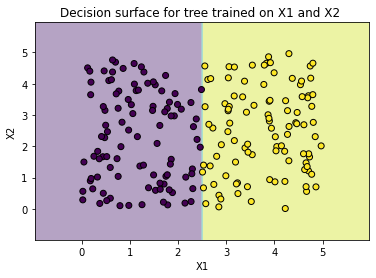

In [965]:
model = DTC(max_depth = 2)
model.fit(X,y)
disp = DecisionBoundaryDisplay.from_estimator(model, X, response_method="predict",xlabel='X1',alpha = 0.4, ylabel='X2')
disp.ax_.scatter(X[:, 0], X[:, 1], c=y,edgecolor="k")
plt.title(f"Decision surface for tree trained on X1 and X2 ")
plt.show()

In [966]:
X_rot = np.ones(shape = (200,2))
for k in range(200):
  cord = X[k]
  x = float(cord[0])
  y1 = float(cord[1])
  length = ((x**2+y1**2)**(0.5))
  slope = y1/x
  angle = math.atan(slope)
  angle = angle - 0.7853981633974483
  sine_ang = math.sin(angle)
  cosine_ang = math.cos(angle)
  y2 = sine_ang*length
  x = cosine_ang*length
  X_rot[k,0] = x
  X_rot[k,1] = y2

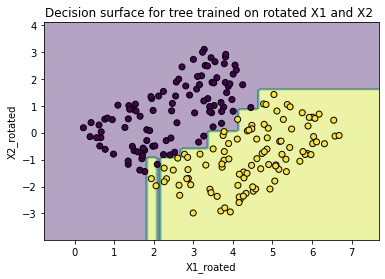

In [967]:
model = DTC()
model.fit(X_rot,y)
disp = DecisionBoundaryDisplay.from_estimator(model, X_rot, response_method="predict",xlabel='X1_roated',alpha = 0.4, ylabel='X2_rotated')
disp.ax_.scatter(X_rot[:, 0], X_rot[:, 1], c=y,edgecolor="k")
plt.title(f"Decision surface for tree trained on rotated X1 and X2 ")
plt.show()

Regression
Question 2(1)

In [968]:
data = pd.read_csv('/task.csv')
print(data)

            X         Y
0    0.374540 -0.005042
1    0.950714  0.835799
2    0.731994  0.244592
3    0.598658 -0.032501
4    0.156019  0.659870
..        ...       ...
195  0.349210 -0.049795
196  0.725956  0.132379
197  0.897110  0.609442
198  0.887086  0.630434
199  0.779876  0.460857

[200 rows x 2 columns]


In [969]:
X = data['X']
Y = data['Y']
user_prompt = 0.2
user_enable = True

x_train,x_test,y_train,y_test = tts(X,Y,test_size=user_prompt,shuffle=user_enable)
x_train = np.array(x_train)
x_train= x_train.reshape(-1, 1)
x_test = np.array(x_test)
x_test = x_test.reshape(-1,1)

<function matplotlib.pyplot.show(*args, **kw)>

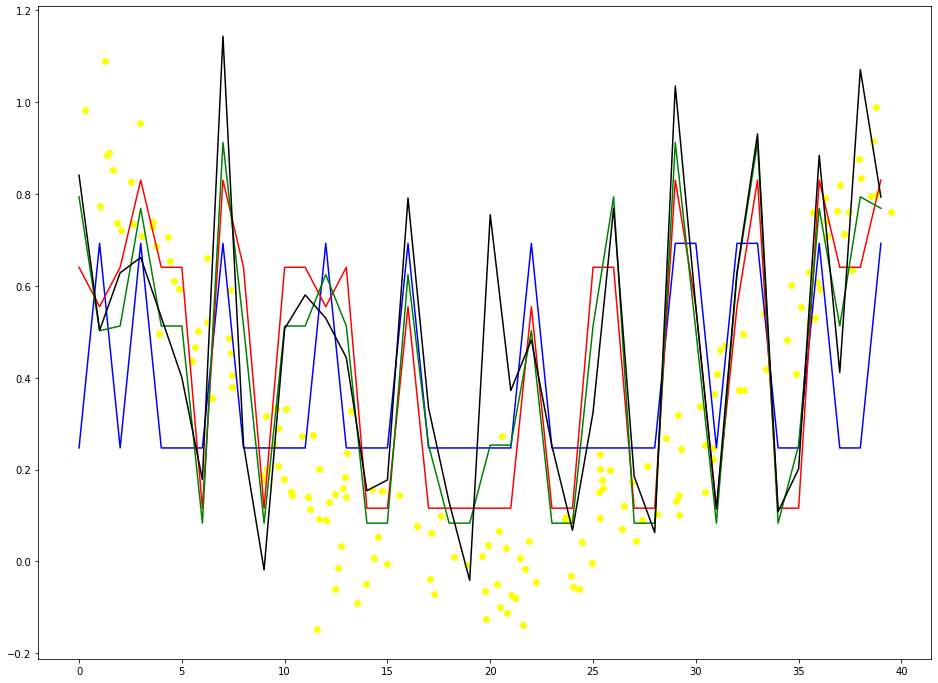

In [970]:
i = np.linspace(0,39,40)
plt.figure(figsize=(16, 12))
model = DTR(max_depth = 1)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
plt.plot(i,y_pred,color = 'blue')
model = DTR(max_depth = 2)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
plt.plot(i,y_pred,color = 'red')
model = DTR(max_depth = 3)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
plt.plot(i,y_pred,color = 'green')
plt.plot(i,y_test,color = 'black')
plt.scatter(x_train*40,y_train, color = 'yellow')
plt.show

Regression Question 2(2)

<function matplotlib.pyplot.show(*args, **kw)>

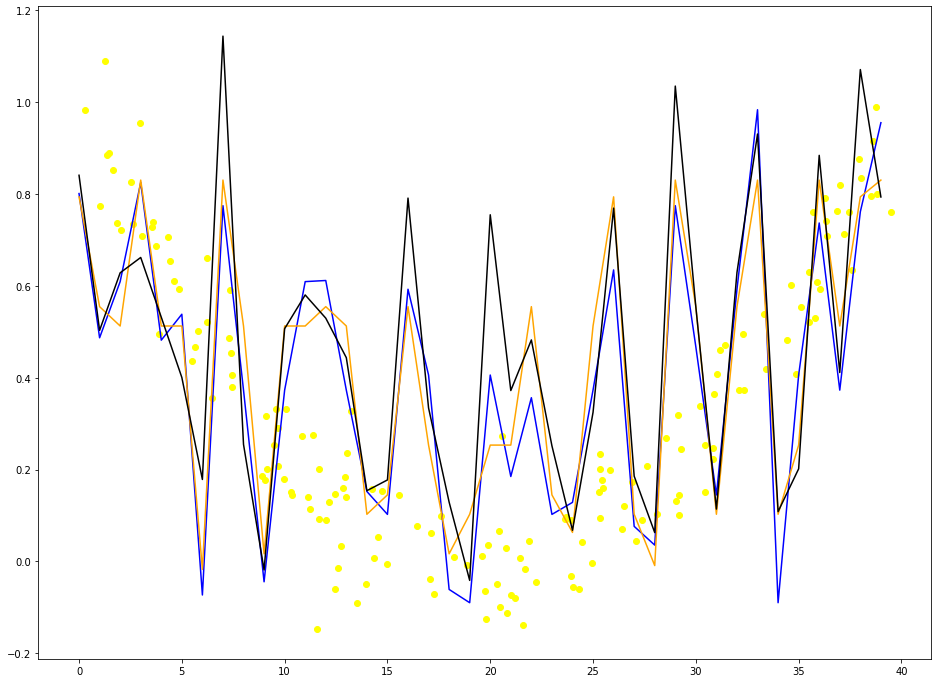

In [971]:
i = np.linspace(0,39,40)
plt.figure(figsize=(16, 12))
model = DTR(min_samples_leaf = 1)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
plt.plot(i,y_pred,color = 'blue')
model = DTR(min_samples_leaf = 10)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
plt.plot(i,y_pred,color = 'orange')
plt.plot(i,y_test,color = 'black')
plt.scatter(x_train*40,y_train, color = 'yellow')
plt.show

Question 3(1)

In [972]:
penguins = load_penguins()
penguins = penguins.sample(frac = 1).reset_index(drop = True)
print(penguins)

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Chinstrap      Dream            49.3           19.9              203.0   
1       Adelie      Dream            41.1           18.1              205.0   
2       Gentoo     Biscoe            50.5           15.2              216.0   
3       Adelie  Torgersen            36.2           16.1              187.0   
4       Gentoo     Biscoe            48.5           15.0              219.0   
..         ...        ...             ...            ...                ...   
339     Adelie      Dream            33.1           16.1              178.0   
340     Gentoo     Biscoe            45.8           14.2              219.0   
341     Gentoo     Biscoe            45.3           13.8              208.0   
342     Gentoo     Biscoe            48.4           16.3              220.0   
343  Chinstrap      Dream            46.1           18.2              178.0   

     body_mass_g     sex  year  
0         4050.0  

In [973]:
print(penguins.shape)

(344, 8)


In [974]:
print(penguins.isnull().any())
print(penguins.isnull().sum())

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


In [975]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [976]:
penguins.describe(include=['O'])

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,152,168,168


In [977]:
penguins.bill_length_mm.fillna(0,inplace = True)
rows_dropped = []
for i,row in penguins.iterrows():
  if row['bill_length_mm'] == 0:
    rows_dropped.append(i)
penguins = penguins.drop(list(set(rows_dropped)), axis=0, inplace=False)
print(rows_dropped)

[141, 222]


In [978]:
print(penguins.shape)
print(penguins.isnull().any())
print(penguins.isnull().sum())

(342, 8)
species              False
island               False
bill_length_mm       False
bill_depth_mm        False
flipper_length_mm    False
body_mass_g          False
sex                   True
year                 False
dtype: bool
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
year                 0
dtype: int64


In [979]:
penguins["sex"].fillna(penguins["sex"].mode()[0],inplace = True)


In [980]:
print(penguins.shape)
print(penguins.isnull().any())
print(penguins.isnull().sum())

(342, 8)
species              False
island               False
bill_length_mm       False
bill_depth_mm        False
flipper_length_mm    False
body_mass_g          False
sex                  False
year                 False
dtype: bool
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64


In [981]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029240
std,5.459584,1.974793,14.061714,801.954536,0.817168
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [982]:
penguins.describe(include=['O'])

,species,island,sex
count,342,342,342
unique,3,3,2
top,Adelie,Biscoe,male
freq,151,167,177


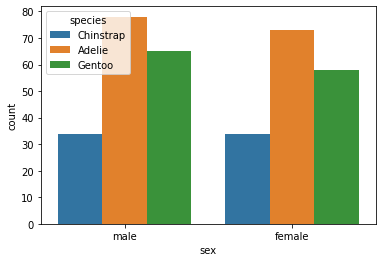

In [983]:
#code for visulisation
sns.countplot(x='sex',hue = 'species' ,data=penguins)

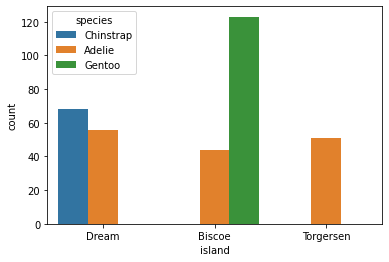

In [984]:
sns.countplot(x='island',hue = 'species' ,data=penguins)

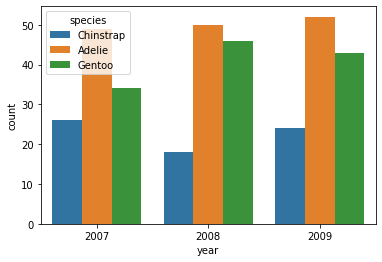

In [985]:
sns.countplot(x='year',hue = 'species' ,data=penguins)

In [986]:
penguins['year'] = penguins['year'].astype(str)
print(penguins.columns)

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')


In [987]:
continuous_features = penguins.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
penguins[continuous_features] = scaler.fit_transform(penguins[continuous_features])

In [988]:
label_encode = LabelEncoder()
penguins['species'] = label_encode.fit_transform(penguins.species)
label_encode1 = LabelEncoder()
penguins['island'] = label_encode1.fit_transform(penguins.island)
label_encode2 = LabelEncoder()
penguins['sex'] = label_encode2.fit_transform(penguins.sex)
label_encode3 = LabelEncoder()
penguins['year'] = label_encode3.fit_transform(penguins.year)

In [989]:
print(penguins)

     species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0          1       1        0.986513       1.393998           0.148478   
1          0       1       -0.517634       0.481175           0.290916   
2          2       0        1.206632      -0.989485           1.074328   
3          0       2       -1.416453      -0.533073          -0.991031   
4          2       0        0.839767      -1.090910           1.287986   
..       ...     ...             ...            ...                ...   
339        0       1       -1.985094      -0.533073          -1.632005   
340        2       0        0.344499      -1.496609           1.287986   
341        2       0        0.252783      -1.699459           0.504574   
342        2       0        0.821424      -0.431649           1.359205   
343        1       1        0.399529       0.531887          -1.632005   

     body_mass_g  sex  year  
0      -0.189508    1     2  
1       0.122687    1     1  
2       0.996834    0

male--->1(sex)
female--->0(sex)
Adelie--->0 (species)
chinstrap--->1 (species)
gentoo--->2 (species)
Torgersen--->2 (island)
Dream--->1 (island)
biscoe island--->0 (island)

In [990]:
Y = penguins.species.astype(int)
X = penguins.drop(["species"], axis = 'columns')
user_prompt = 0.2
user_enable = False

x_train,x_test,y_train,y_test = tts(X,Y,test_size=user_prompt,shuffle=user_enable)
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)
y_train1 = np.array(y_train)
y_train1 = y_train1.reshape(-1,1)


(69, 7)
(273, 7)
(69,)
(273,)


Question 3(2)

In [991]:
def gini_index(data, feature, target_column):
    unique_values, group_counts = np.unique(feature, return_counts=True)
    total_samples = len(data)
    gini = 0.0
    for value, count in zip(unique_values, group_counts):
        value_group = data[feature == value]
        target_group = target_column[feature == value]
        gini_value = 1.0 - sum([(class_count/len(value_group))**2 for class_count in np.unique(target_group, return_counts=True)[1]])
        gini += gini_value * len(value_group) / total_samples
    return gini
print(gini_index(x_train,x_train['sex'],y_train))
print(gini_index(x_train,x_train['year'],y_train))
print(gini_index(x_train,x_train['island'],y_train))

0.6286904623124584
0.6282933009777594
0.3685386778170283


Question 3(3)

In [992]:
global idx_list
idx_list = {}
def best_index(x, x_feature, y):
  dataset_col = x[x_feature]
  feature_class = np.array(dataset_col)
  temp_feature = np.ones(shape = (len(feature_class),1))
  gini_list = []
  for i in range(len(feature_class)):
    val = feature_class[i]
    for j in range(len(feature_class)):
      if feature_class[j] <= val:
        temp_feature[j] = 0
      else:
        temp_feature[j] = 1
    some = gini_index(x, temp_feature, y)
    gini_list.append(some)
  return gini_list.index(min(gini_list))
def cont_to_cat(x, y,col_lst):
  for x_feature in col_lst:
    b_index = best_index(x, x_feature, y)
    threshold = x.at[b_index, x_feature]
    idx_list[x_feature] = threshold
    print(threshold)
    for index, value in x[x_feature].iteritems():
      if value > threshold:
        x.at[index, x_feature] = 1
      else:
        x.at[index, x_feature] = 0
  return x 
  

clist = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']  
  
cont_to_cat(x_train,y_train1,clist)

print(x_train)
print(idx_list)

-0.13242540743925146
-0.38093620256967714
0.6470126324324865
-1.3758494152175464
     island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0         1             1.0            1.0                0.0          1.0   
1         1             0.0            1.0                0.0          1.0   
2         0             1.0            0.0                1.0          1.0   
3         2             0.0            0.0                0.0          1.0   
4         0             1.0            0.0                1.0          1.0   
..      ...             ...            ...                ...          ...   
270       0             1.0            0.0                1.0          1.0   
271       1             0.0            1.0                0.0          1.0   
272       1             1.0            1.0                0.0          1.0   
273       0             1.0            0.0                1.0          1.0   
274       0             1.0            0.0                1.0

In [993]:
x_train2 = np.array(x_train)
print(gini_index(x_train2,x_train2[:,1],y_train1))

0.3114435290545386


In [994]:
x_train1 = np.array(x_train)
for i in range(len(x_train1[0,:])):
  print(np.unique(x_train1[:,i], return_counts = True))
print(np.unique(y_train1, return_counts = True))

(array([0., 1., 2.]), array([132,  97,  44]))
(array([0., 1.]), array([131, 142]))
(array([0., 1.]), array([ 94, 179]))
(array([0., 1.]), array([189,  84]))
(array([0., 1.]), array([ 10, 263]))
(array([0., 1.]), array([124, 149]))
(array([0., 1., 2.]), array([84, 91, 98]))
(array([0, 1, 2]), array([125,  52,  96]))


In [995]:
idx_list

{'bill_length_mm': -0.13242540743925146,
 'bill_depth_mm': -0.38093620256967714,
 'flipper_length_mm': 0.6470126324324865,
 'body_mass_g': -1.3758494152175464}

In [996]:
y_train

0      1
1      0
2      2
3      0
4      2
      ..
270    2
271    0
272    1
273    2
274    2
Name: species, Length: 273, dtype: int64

In [997]:
x_train

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,1.0,1.0,0.0,1.0,1,2
1,1,0.0,1.0,0.0,1.0,1,1
2,0,1.0,0.0,1.0,1.0,0,2
3,2,0.0,0.0,0.0,1.0,0,1
4,0,1.0,0.0,1.0,1.0,0,2
...,...,...,...,...,...,...,...
270,0,1.0,0.0,1.0,1.0,1,1
271,1,0.0,1.0,0.0,1.0,1,2
272,1,1.0,1.0,0.0,1.0,1,1
273,0,1.0,0.0,1.0,1.0,0,0


In [998]:
x_train = np.array(x_train)
print(x_train)

[[1. 1. 1. ... 1. 1. 2.]
 [1. 0. 1. ... 1. 1. 1.]
 [0. 1. 0. ... 1. 0. 2.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [0. 1. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 1. 1. 2.]]


In [999]:
def test_change(x,col_lst):
  for x_feature in col_lst:
    threshold = idx_list[x_feature]
    for index, value in x[x_feature].iteritems():
      if value > threshold:
        x.at[index, x_feature] = 1
      else:
        x.at[index, x_feature] = 0
  return x   
test_change(x_test,clist)
x_test = np.array(x_test)

Question 3(4,5,6)

In [1000]:
from collections import Counter
class Node:
  def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
    self.feature = feature
    self.threshold = threshold
    self.left = left
    self.right = right
    self.value = value
  def checkleaf(self):
    check = self.value is not None
    return check

class DecisionTreeClassifier:
  def __init__(self, max_depth=None, min_samples_leaf=1, max_continuous_splits=2,n_features=None):
    self.max_depth = max_depth
    self.min_samples_leaf = min_samples_leaf
    self.max_continuous_splits = max_continuous_splits
    self.root = None
    self.n_features=n_features


  def fit(self , x ,y):
    self.root = self.build_tree(x,y)
    self.n_features = x.shape[1]


  def build_tree(self,x,y,depth = 0):
    n_samples,n_feats = x.shape
    self.n_features = n_feats
    n_labels = len(np.unique(y))
    #check when to stop
    if (depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_leaf):
      leaf_result = self.out_label(y)
      return Node(value = leaf_result)

    #find best split
    best_feature, best_threshold = self.best_split(x,y)
    #create child nodes
    left_idxs, right_idxs = self.split(x[:, best_feature], best_threshold)
    left = self.build_tree(x[left_idxs, :], y[left_idxs], depth+1)
    right = self.build_tree(x[right_idxs, :], y[right_idxs], depth+1)
    return Node(best_feature, best_threshold, left, right)




  def best_split(self,x,y):
    idxs = []
    for gill in range(self.n_features):
      idxs.append(gill)
    best_gini = 100
    split_name,split_threshold = None,None
    for feat_idx in idxs:
      x_feat = x[:,feat_idx]
      thresholds = np.unique(x_feat)
      for thr in thresholds:
      # calculate the gini value
        gini_value = self.gini_split(x, x_feat, y,thr)
        if gini_value < best_gini:
          best_gini = gini_value
          split_name = feat_idx
          split_threshold = thr
    return split_name , split_threshold
  def gini_split(self,x, x_feature, y,thr):
    gini = 0
    left_idxs, right_idxs = self.split(x_feature, thr)
    if len(left_idxs) == 0 or len(right_idxs) == 0:
        pass
    else:
      gin_l = self.gini_index(x[left_idxs, :],x_feature[left_idxs], y[left_idxs])
      gin_r = self.gini_index(x[right_idxs, :],x_feature[right_idxs], y[right_idxs])
      gini += len(left_idxs)*gin_l + len(right_idxs)*gin_r
    return gini



  def gini_index(self,x, x_feature, y):
    unique_values, group_counts = np.unique(x_feature, return_counts=True)
    total_samples = len(x)
    gini = 0.0
    gini_value = 1.0 - sum([(class_count/total_samples)**2 for class_count in np.unique(y, return_counts=True)[1]])
    gini += gini_value
    return gini


  def split(self, column, split_thresh):
    left_idxs = np.argwhere(column <= split_thresh).flatten()
    right_idxs = np.argwhere(column > split_thresh).flatten()
    return left_idxs, right_idxs

  def out_label(self,y):
    counter = Counter(y)
    value = counter.most_common(1)
    return value    
    
  def predict(self,X_t):
    return np.array([self._traverse_tree(mini, self.root) for mini in X_t])

  def _traverse_tree(self, x, node):
    if node.checkleaf():
      return node.value
    if x[node.feature] <= node.threshold:
      return self._traverse_tree(x, node.left)
    else:
      return self._traverse_tree(x, node.right)


In [1001]:
clf = DecisionTreeClassifier(max_depth = 20)
clf.fit(x_train,y_train1[:,0])
y_pred = clf.predict(x_test)
k = y_pred[:,:,0]
k = k[:,0]
m = np.array(y_test)

def acc(pred,test):
  length = len(pred)
  count = 0
  for i in range(length):
    if pred[i] == test[i]:
      count+= 1
  return count/length
print(acc(k,m))

0.37681159420289856
